Humza Humayun - Homework One - DATA 3421

In [23]:
#open the movies csv and begin work:
import pandas as pd
movie_data_in=pd.read_csv(r"movie.csv")
#movie_data_in.head()
movie_data_in
#initial openeing and viewing od the data - unfiltered and untouched.

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012
...,...,...,...,...,...,...,...
96,SciFi,52,5.3,4950,163.289240,191.404030,2019
97,Thriller,67,7.1,2665,32.723478,447.692942,2002
98,Sci-Fi,61,6.5,3057,126150.789400,483.897336,1999
99,Horror,14,7.4,6838,80.288417,273.442451,1985


In [22]:
#1.Data types of each variable in the csv file 
data_summary=pd.DataFrame(movie_data_in.dtypes)
data_summary

,0
Genre,object
Rotten Tomatoes,int64
IMDB,float64
Audience Ratings,int64
Budget_M,float64
Sales Revenue_M,float64
Year of Release,object


In [35]:
#2. Collecting descriptive statistics for wach variable column
#gonna have to use a for loop to iterate thru the DataFrame movie_data_in and target numeric columns and do the computations:
for col in movie_data_in.select_dtypes(include=['number']):
    print(f"Stats for {col}:\nMean:{movie_data_in[col].mean()}\nMedian:{movie_data_in[col].median()}\nVariance:{movie_data_in[col].var()}\nSD:{movie_data_in[col].std()}\n")

Stats for Rotten Tomatoes:
Mean:53.554455445544555
Median:52.0
Variance:1140.0295049504948
SD:33.76432296004904

Stats for IMDB:
Mean:5.562376237623762
Median:5.4
Variance:6.806170297029702
SD:2.6088637942655617

Stats for Audience Ratings:
Mean:5272.663366336634
Median:5410.0
Variance:8361226.485544555
SD:2891.578545629455

Stats for Budget_M:
Mean:5456.333862190505
Median:92.51132087
Variance:643721208.1936828
SD:25371.661518191566

Stats for Sales Revenue_M:
Mean:239.42276819160418
Median:208.08581105000002
Variance:24413.698324757406
SD:156.24883463487785



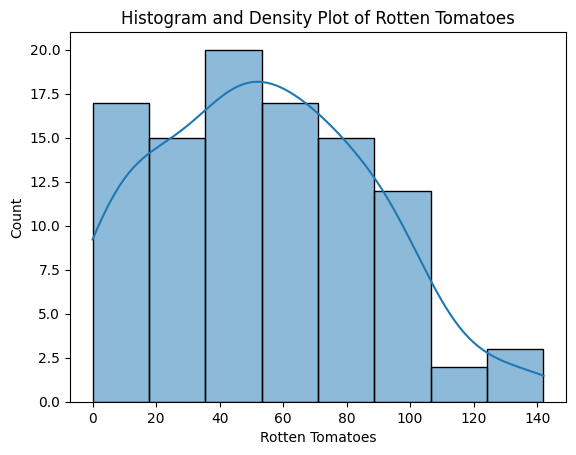

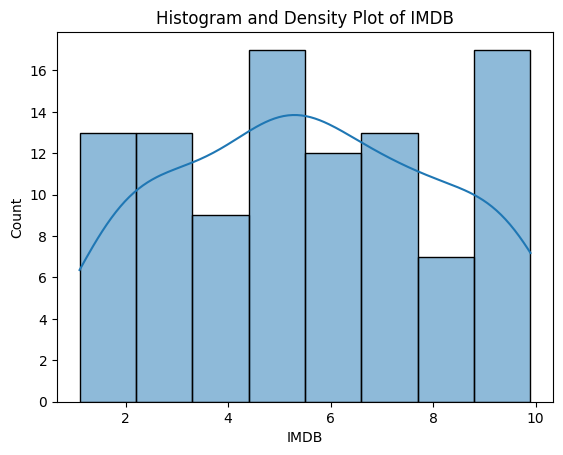

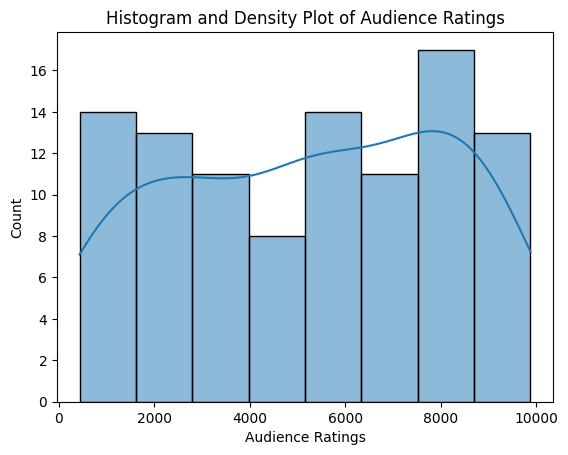

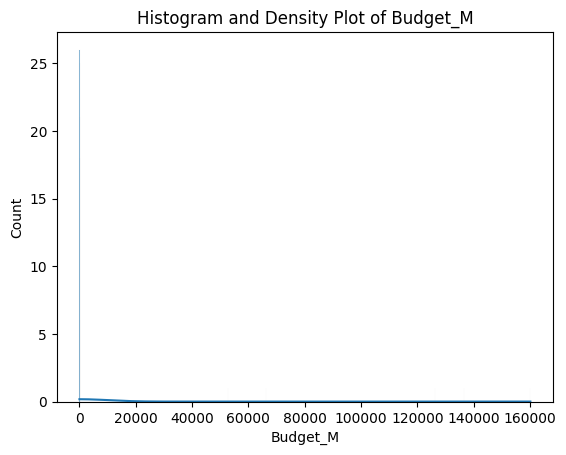

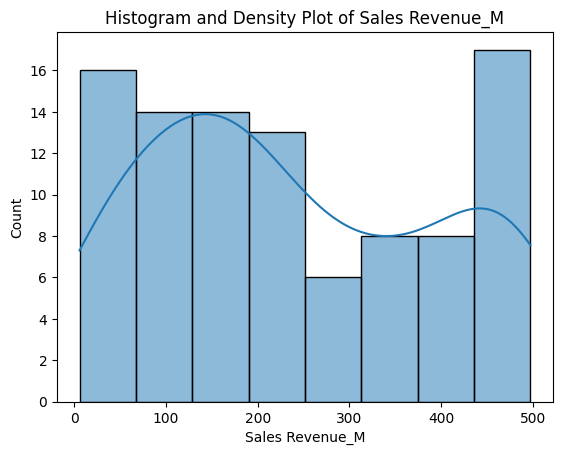

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
#Create histograms and boxplots for each independent variable to examine their
#distribution and skewness. Indicate which variables exhibit right or left skewness or a normal distribution.
for col in movie_data_in.select_dtypes(include=['number']).columns:
    sns.histplot(movie_data_in[col],kde=True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

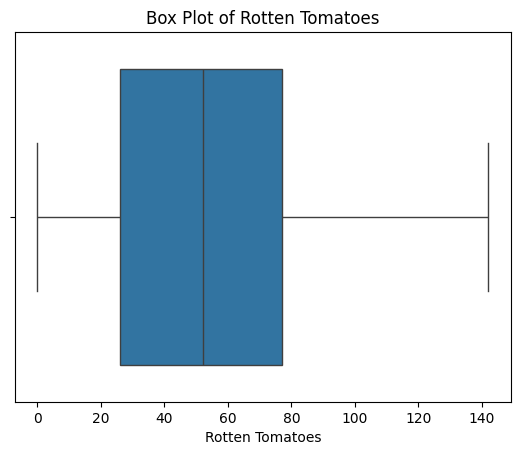

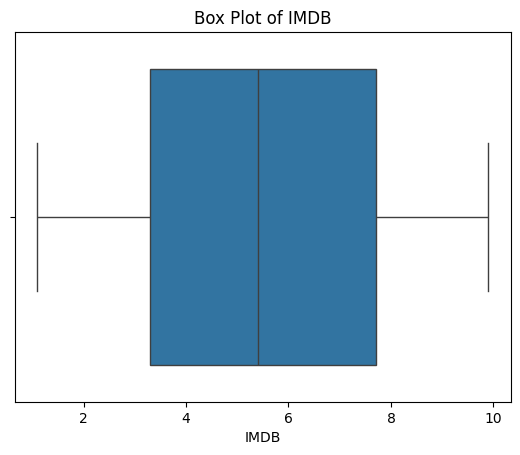

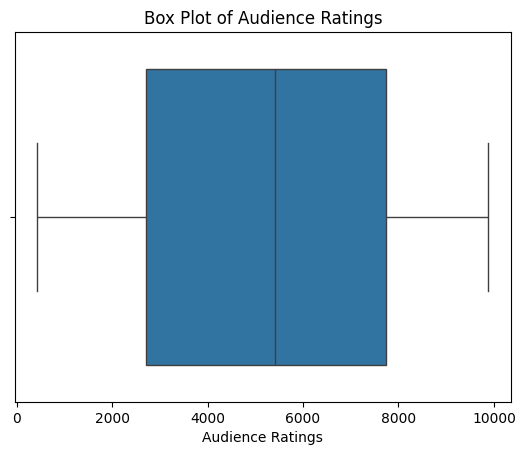

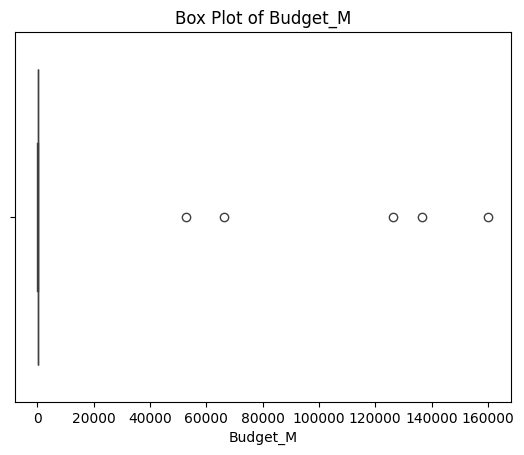

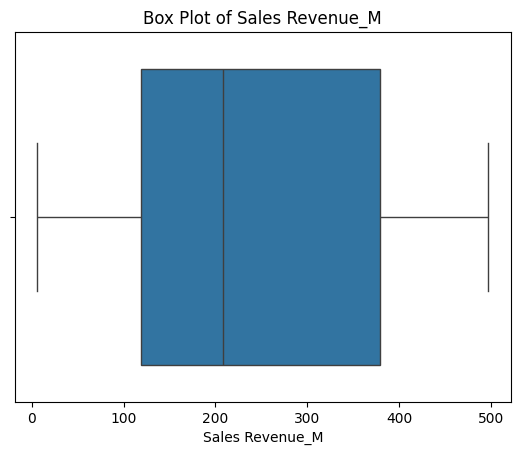

In [41]:
for col in movie_data_in.select_dtypes(include=['number']).columns:
    sns.boxplot(x=movie_data_in[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

Skew and Normalness: Skew is seen in few of the categories, most prominently in the Rotten tomatoes scores and very minimally in Revenue. Much of the histograms show normality or a semblance to it, especially in looking at the trendline over the boxplots.


In [43]:
#4. Which independent variable demonstrates the highest variability in the dataset?
for col in movie_data_in.select_dtypes(include=['number']):
    print(f"Stats for {col}:\nVariance:{movie_data_in[col].var()}\n")

Stats for Rotten Tomatoes:
Variance:1140.0295049504948

Stats for IMDB:
Variance:6.806170297029702

Stats for Audience Ratings:
Variance:8361226.485544555

Stats for Budget_M:
Variance:643721208.1936828

Stats for Sales Revenue_M:
Variance:24413.698324757406



The Budget variable has the highest amoint of variability in the dataset.

In [52]:
#5a Determine which independent variable shows a positive correlation with the dependent variable, 'Sales Revenue (M$)
#5b Which variables show a strong correlation with Sales Revenue? Does a higher budget correlate with higher sales revenue?

correlation_mat=movie_data_in.corr()
correlation_mat

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
Rotten Tomatoes,1.000000,-0.010546,-0.126204,-0.051246,-0.122929
IMDB,-0.010546,1.000000,0.126555,-0.053704,-0.041741
Audience Ratings,-0.126204,0.126555,1.000000,-0.111453,-0.011118
Budget_M,-0.051246,-0.053704,-0.111453,1.000000,0.030309
Sales Revenue_M,-0.122929,-0.041741,-0.011118,0.030309,1.000000


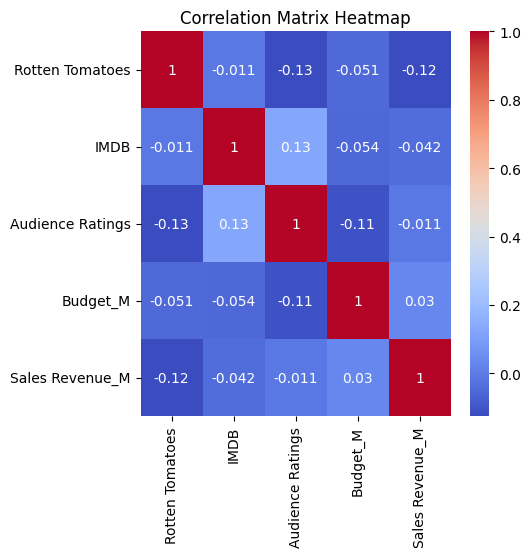

In [53]:
plt.figure(figsize=(5,5))

sns.heatmap(correlation_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

- Budget is the independent variable with a positive correlation with sales revenue (both values in Millions of Dollars), with a score of 0.03, 

- The budget, by far, is the most positively (if not, the ONLY one) correlated variable to sales revenue. In terms of budget being an indicator to high sales of a film, there is a low but positive corelation coefficient of 0.03 which indicates a weak relationship between the two. 

In [67]:
#6 - Analyze the dataset to find out which genre has recorded the highest average sales revenue.

#Listings of all genres:
movie_data_in["Genre"].unique()
for entry in movie_data_in["Genre"].value_counts().items():
    print(entry)
    
    #this will pull the mean sales per genre
sales_by_genre=movie_data_in.groupby('Genre')['Sales Revenue_M'].mean()
sales_by_genre

('Action', 16)
('Romance', 15)
('Thriller', 15)
('Comedy', 15)
('Horror', 10)
('Drama', 9)
('Documentary', 9)
('Sci-Fi', 7)
('SciFi', 5)


Genre
Action         211.912239
Comedy         274.681964
Documentary    266.861327
Drama          262.442125
Horror         208.158593
Romance        258.482172
Sci-Fi         220.159045
SciFi          168.914181
Thriller       231.493154
Name: Sales Revenue_M, dtype: float64

In [70]:
highest_per_genre=sales_by_genre.idxmax()
highest_per_genre

'Comedy'

The genre that has the highest average sales is Comedy.

In [73]:
#7 - Investigate the relationship between 'Budget (M$)' and 'Sales Revenue (M$)'.
#Does a higher budget correlate with higher sales revenue?
correlation = movie_data_in['Budget_M'].corr(movie_data_in['Sales Revenue_M'])
correlation

0.030308853749523895

The relationship between Budget and Sales Revenue is positive but very weak, it is below the optimal value of 1; 0.030308853749523895

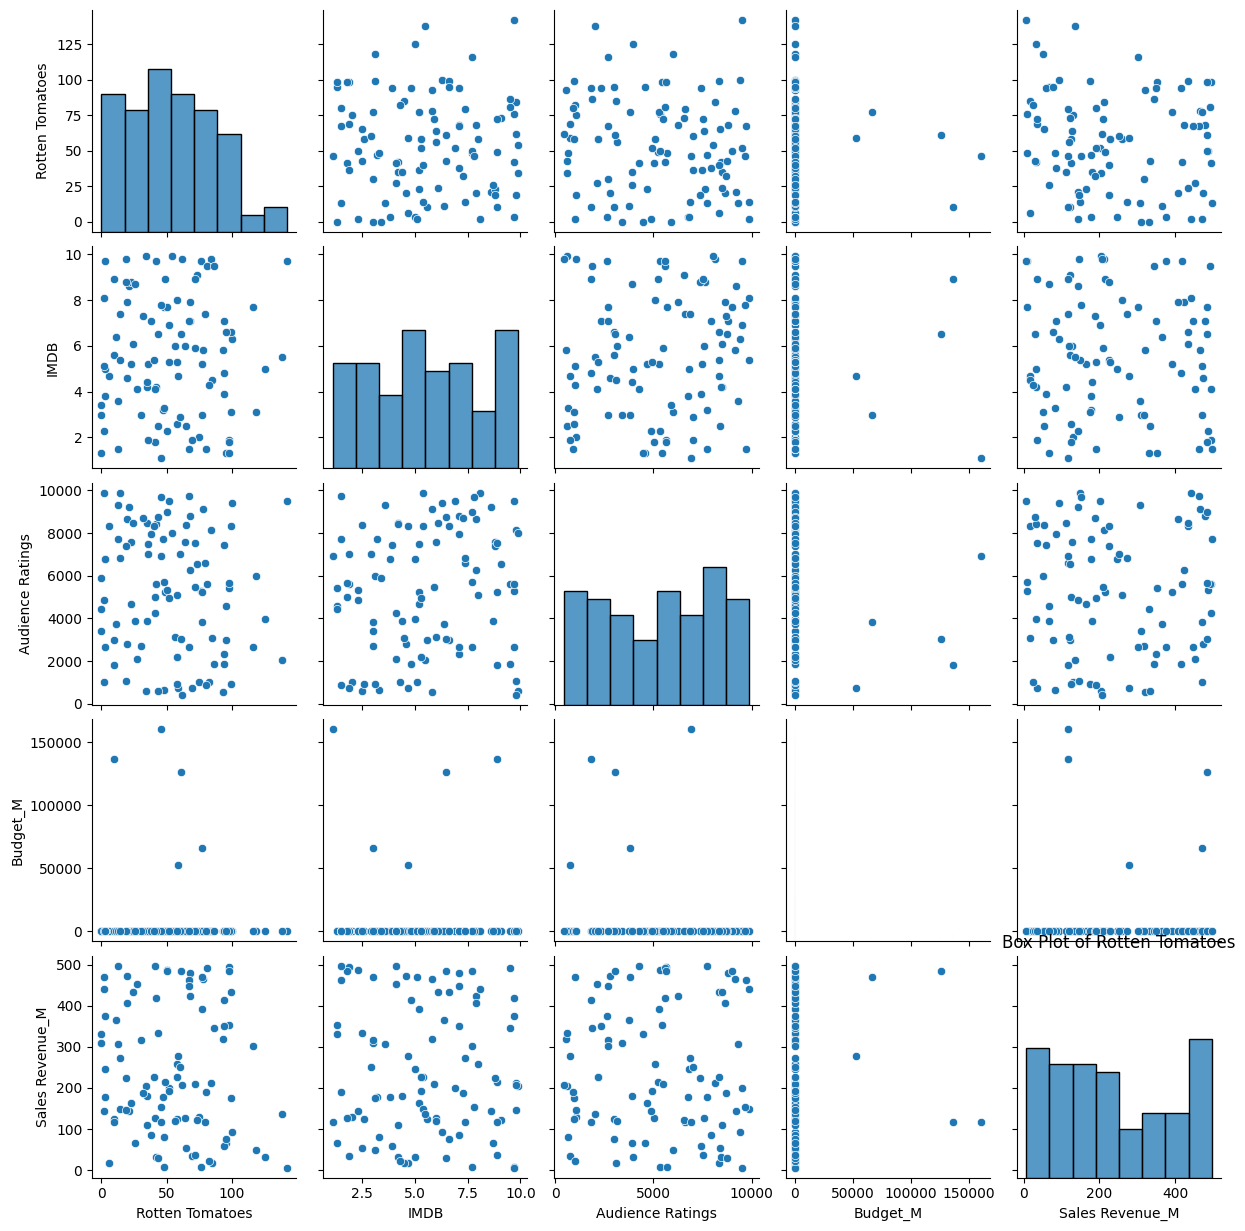

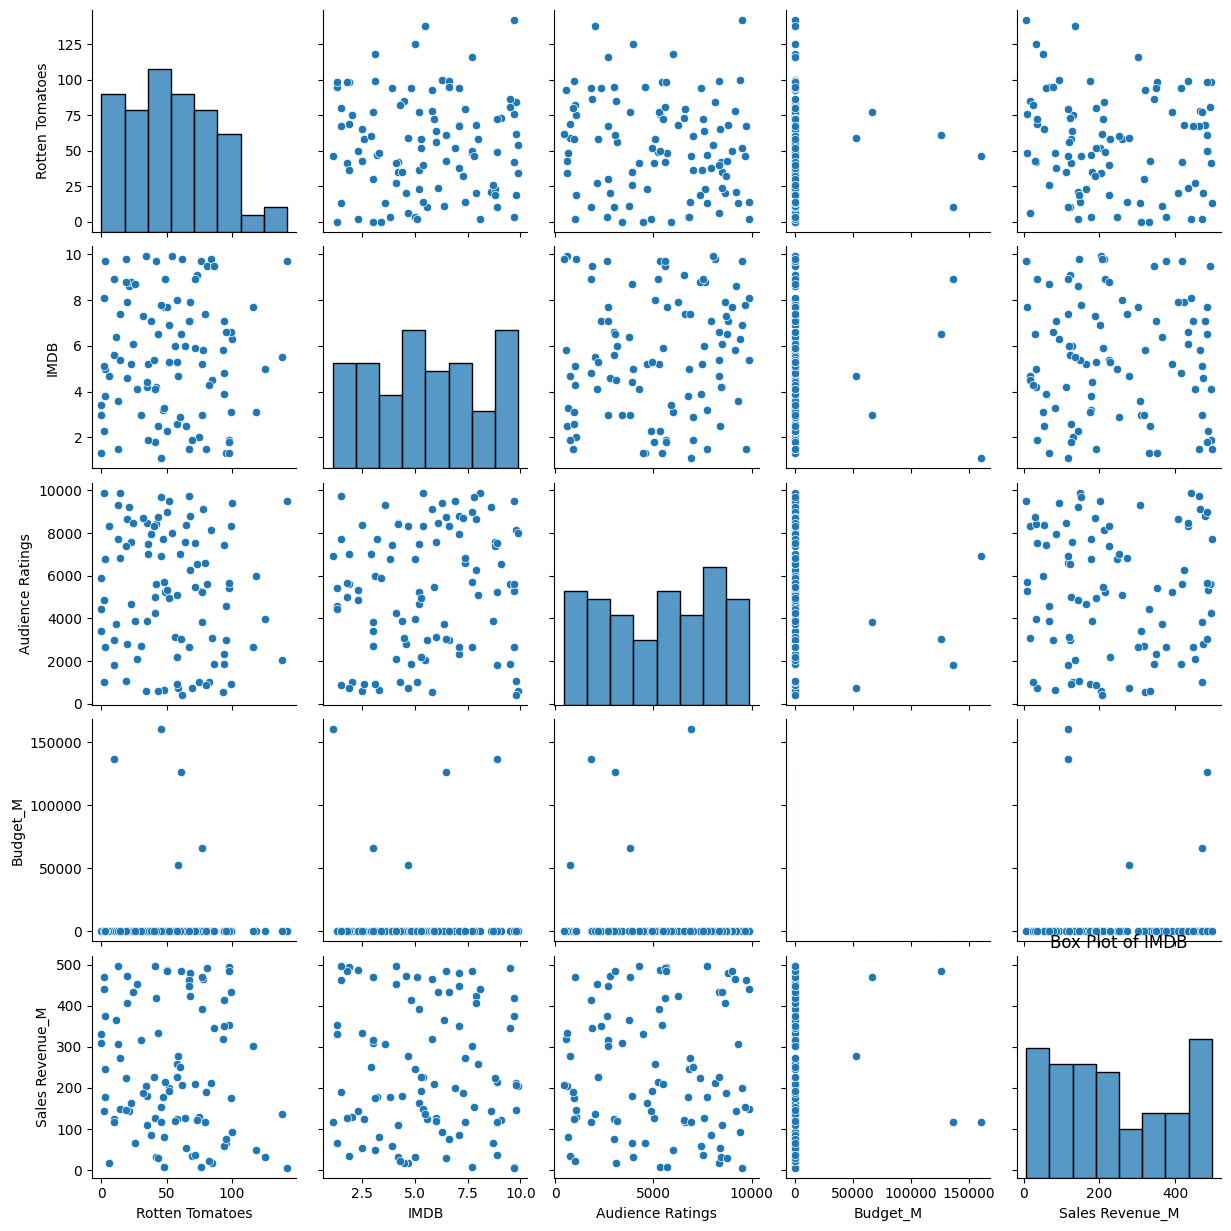

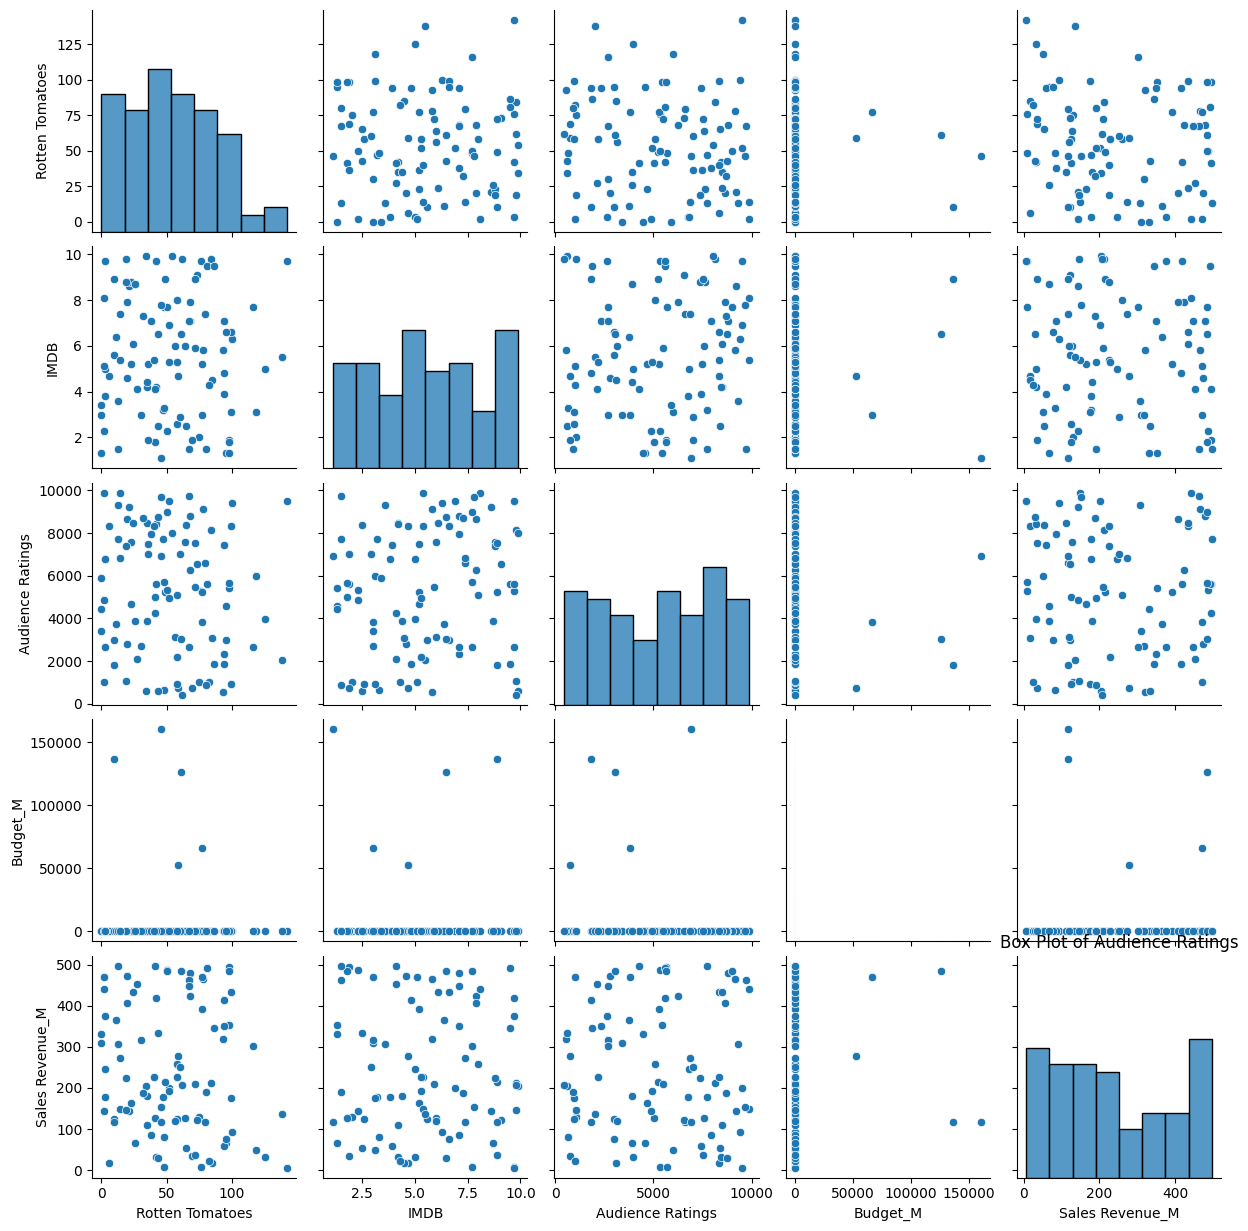

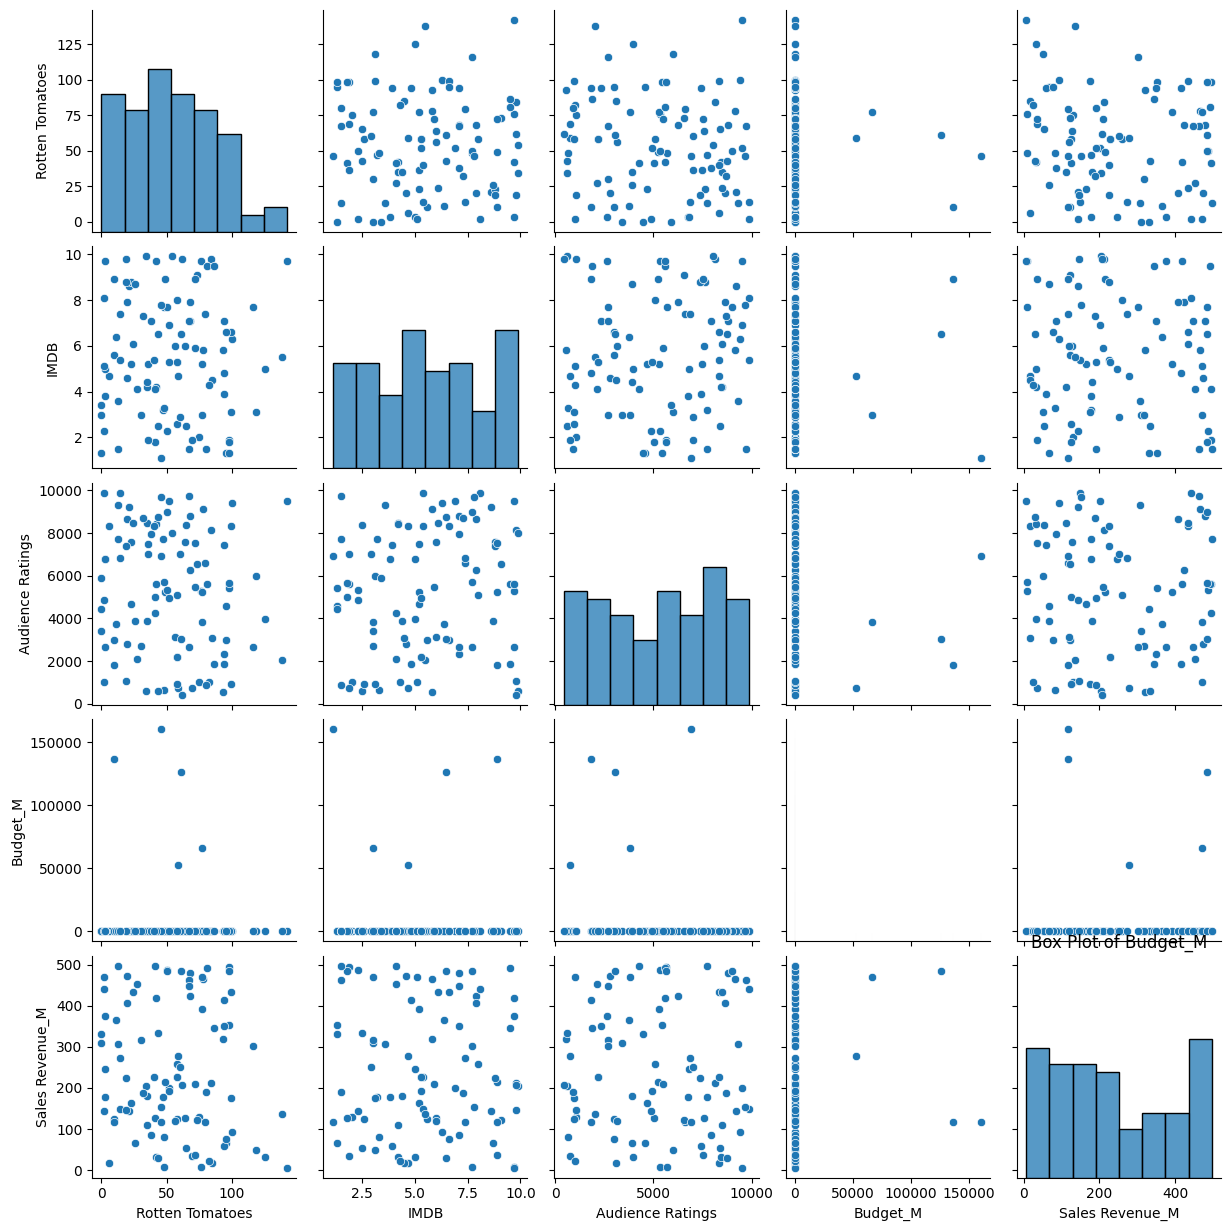

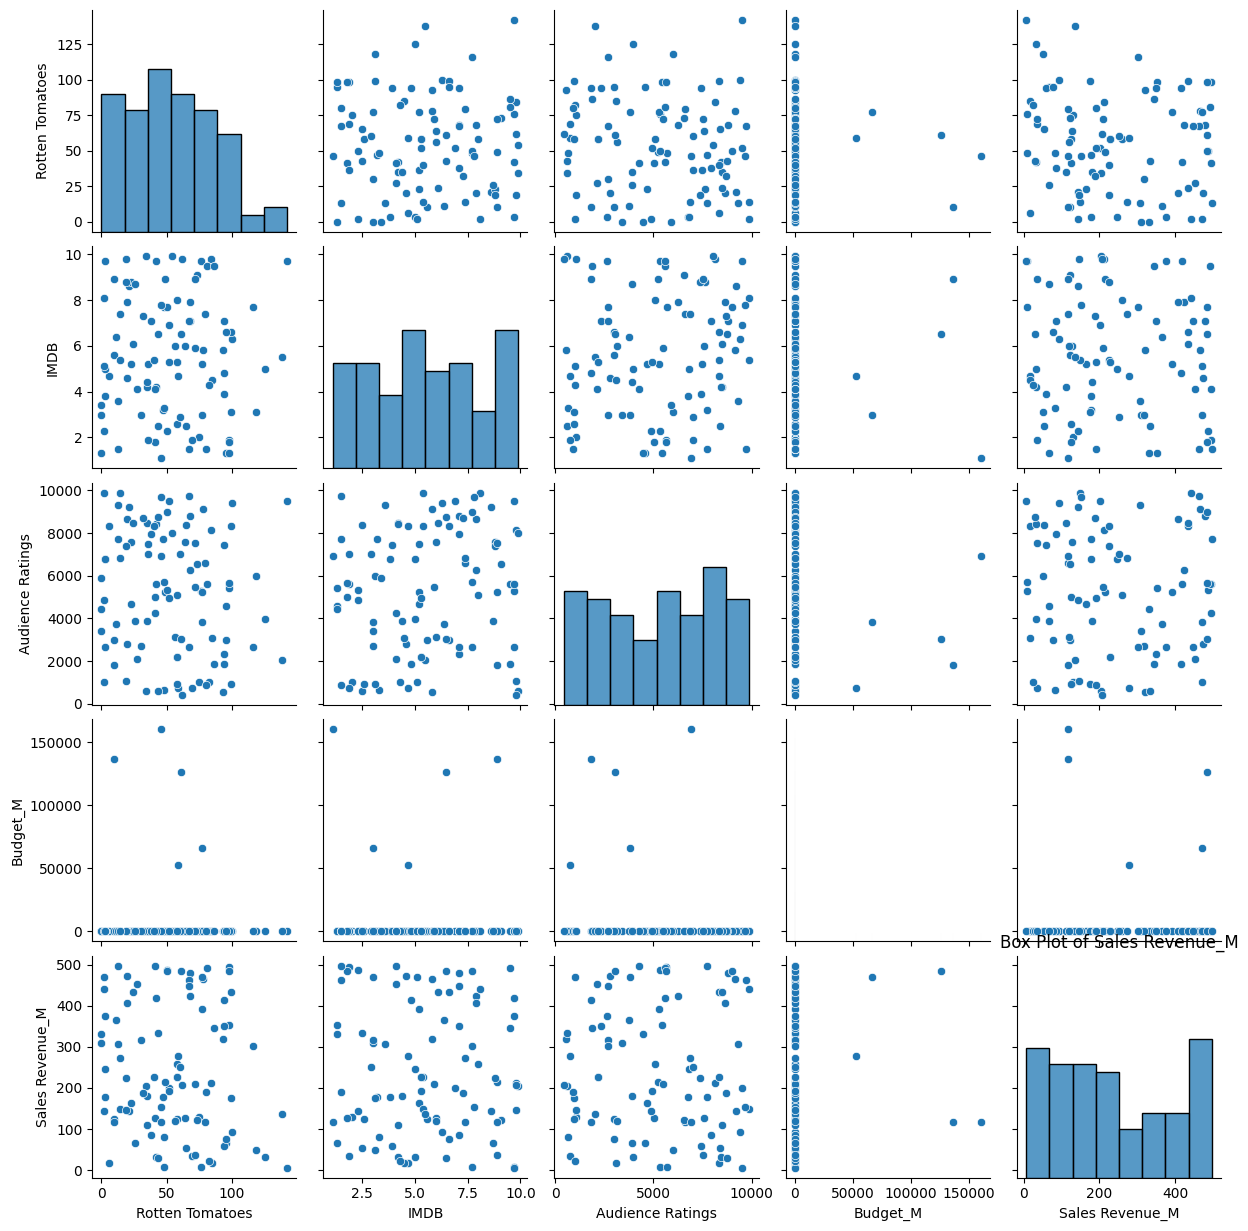

In [74]:
#8 - Construct pairwise comparison graphs to explore relationships between all variables.
for col in movie_data_in.select_dtypes(include=['number']).columns:
    sns.pairplot(movie_data_in)
    plt.title(f"Box Plot of {col}")
    plt.show()

/home/hhmyn/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1280: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


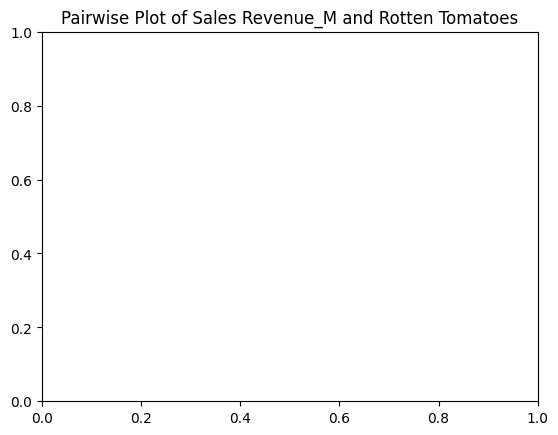

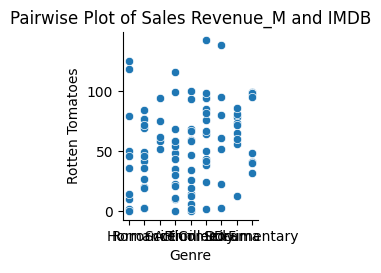

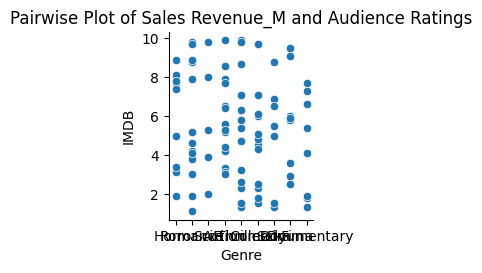

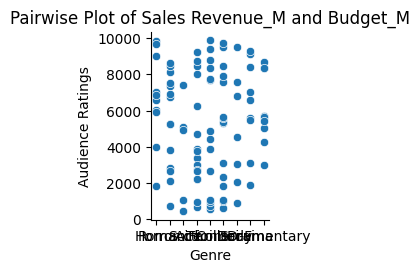

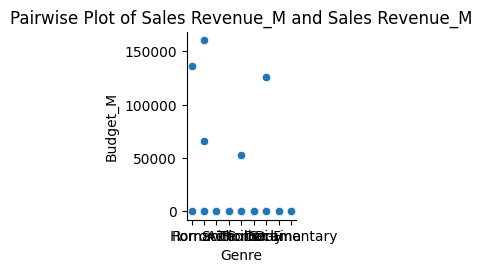

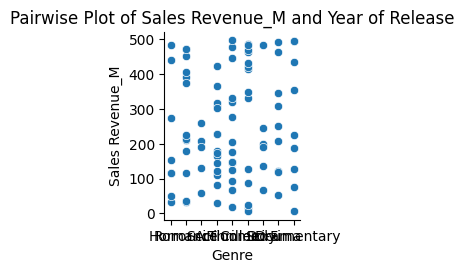

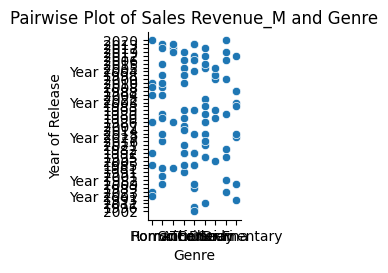

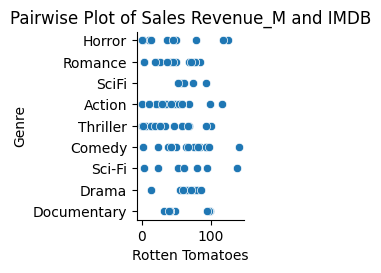

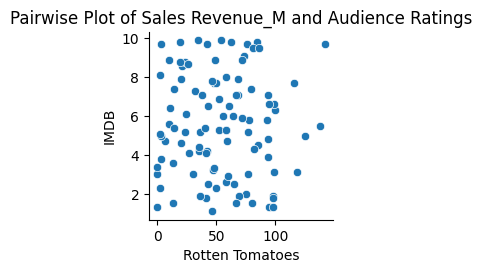

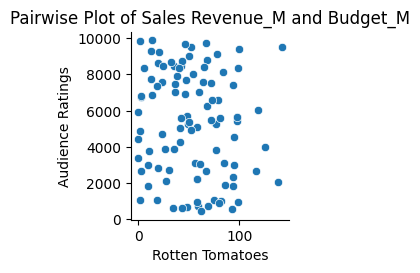

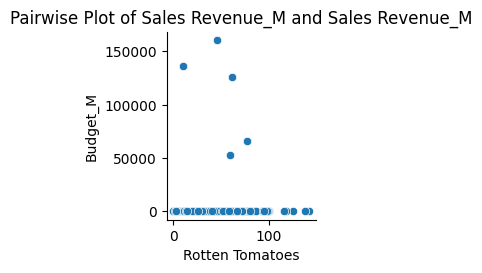

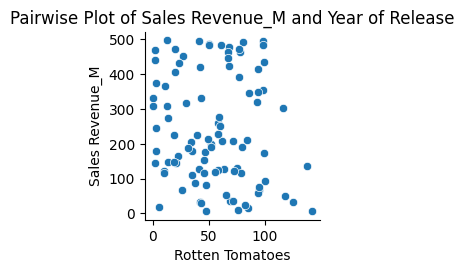

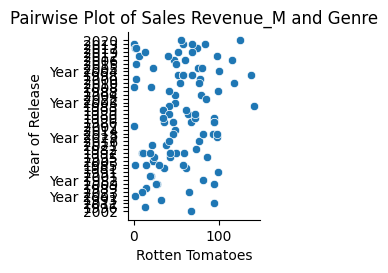

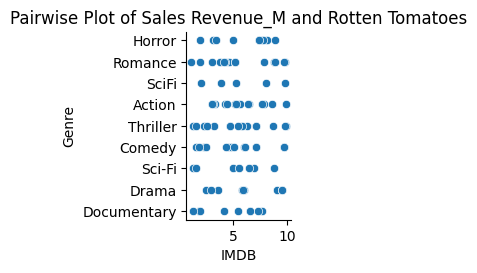

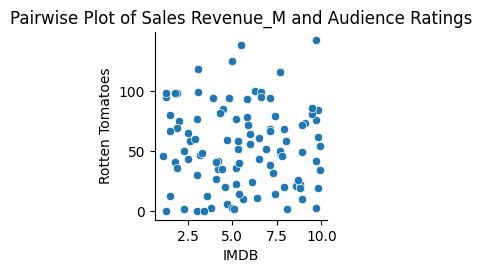

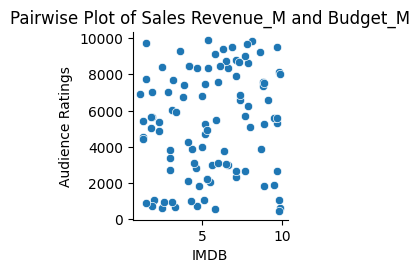

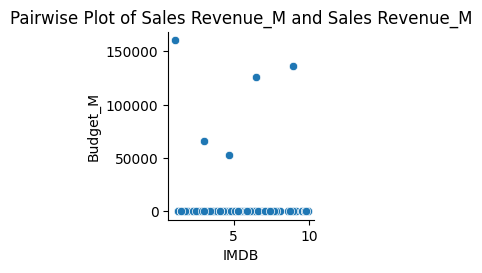

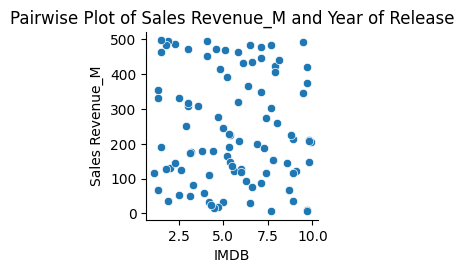

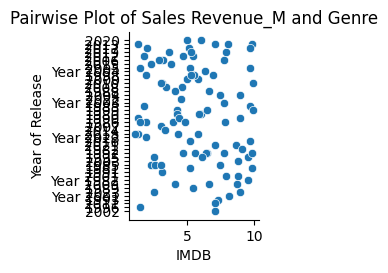

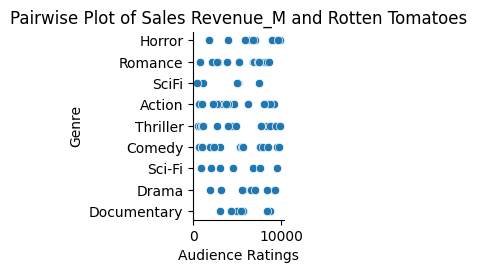

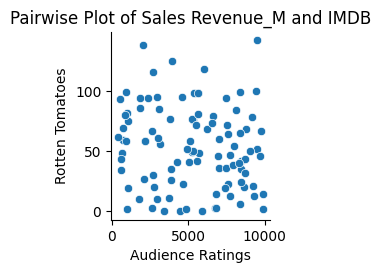

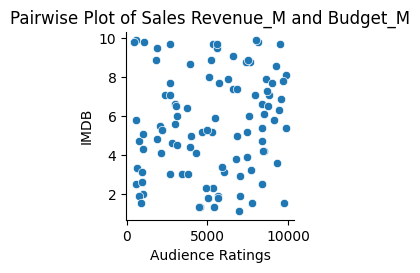

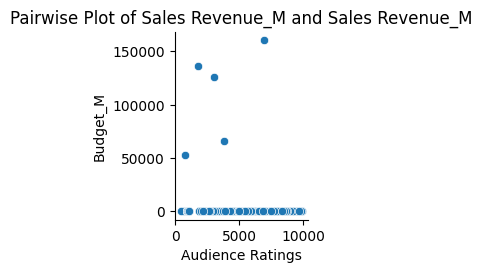

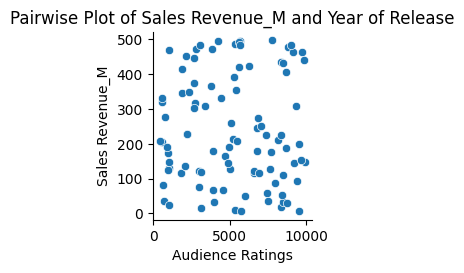

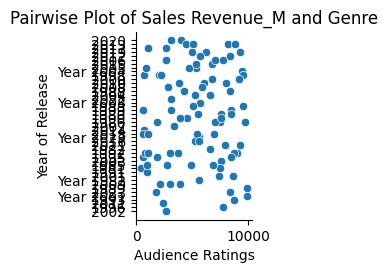

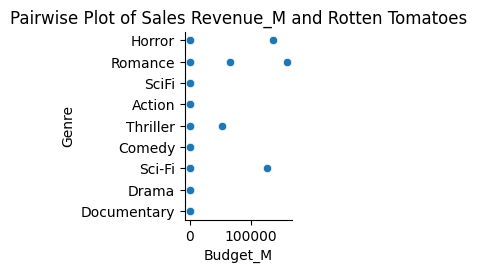

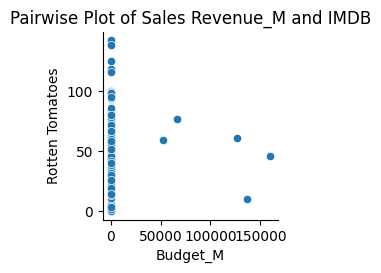

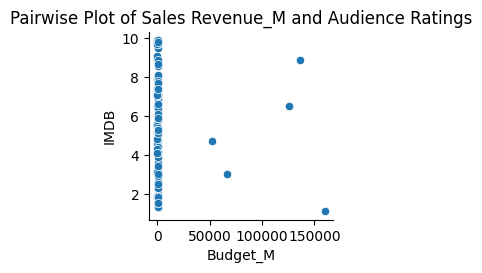

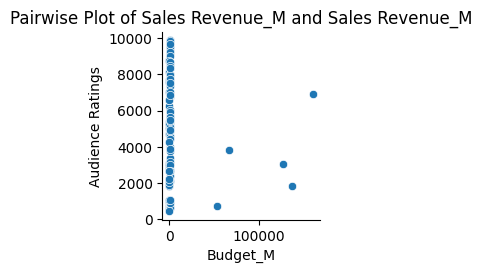

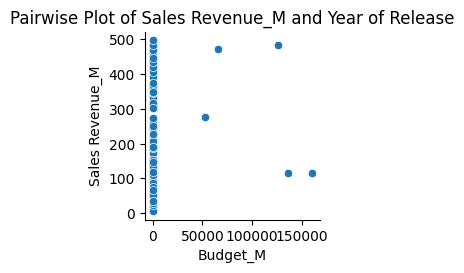

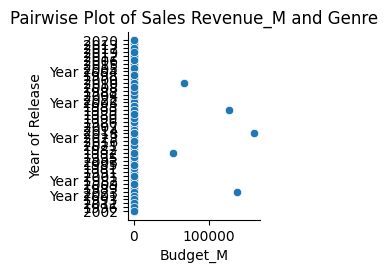

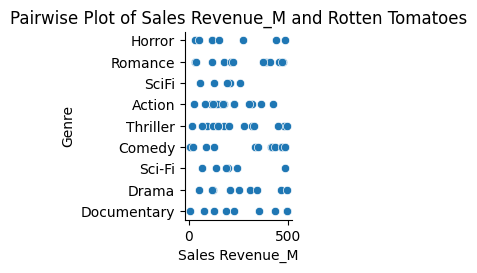

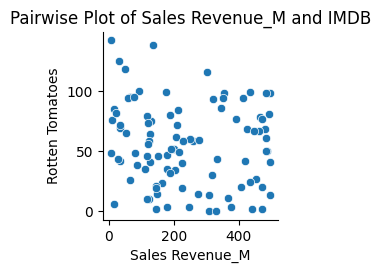

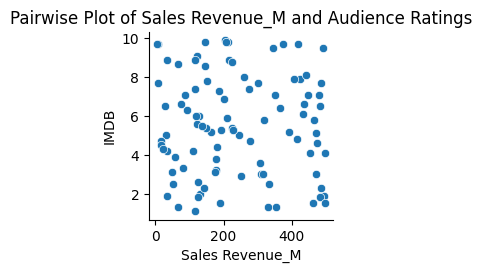

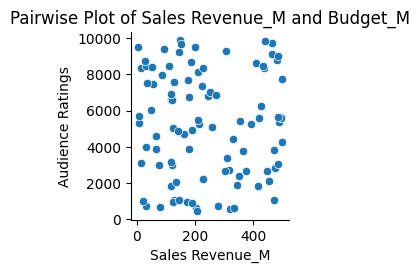

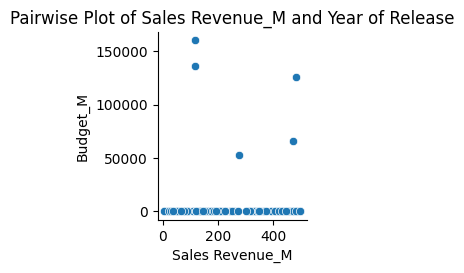

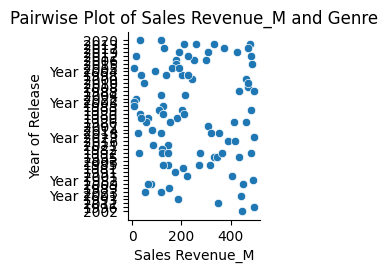

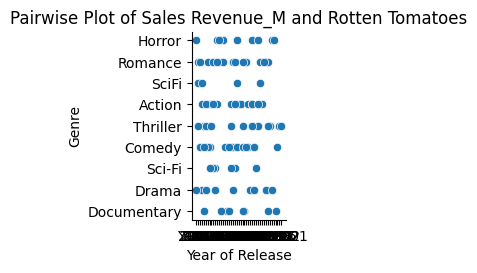

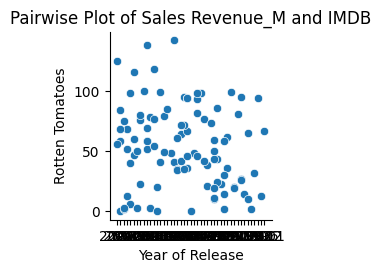

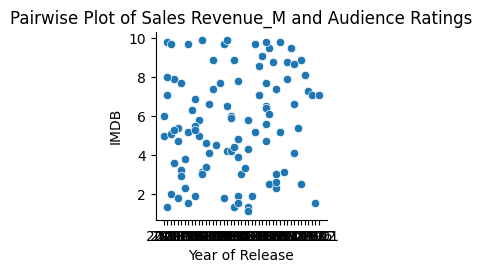

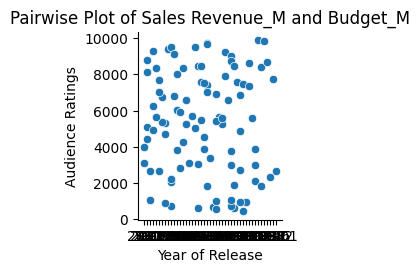

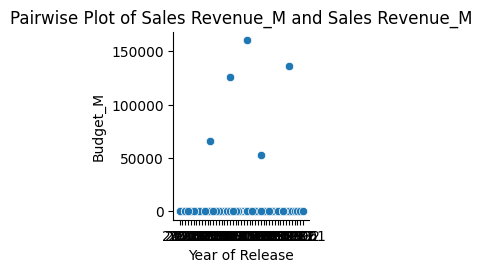

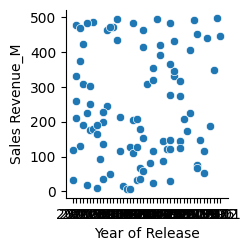

In [77]:
for col1 in movie_data_in.columns:
    for col2 in movie_data_in.columns:
        if col1 != col2:  # Exclude self-comparisons
            plt.title(f"Pairwise Plot of {col} and {col2}")
            sns.pairplot(movie_data_in, x_vars=col1, y_vars=col2)

In [78]:
#9 -Inspect the dataset for missing values. What is the extent of incompleteness in terms of missing values and attributes?
missing_data=movie_data_in.isnull().sum()
print("Missing data:\n",missing_data )

Missing data:
 Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64


Missing data can significantly alter the data computation and model that is made around it. It causes inaccurate estimates to be made and the conclusions made from the models are misleading.

In [79]:
#10 - Examine the dataset for noisy data, including errors and imprecise entries. How might these affect the analysis?
print(movie_data_in[movie_data_in.duplicated()])

      Genre  Rotten Tomatoes  IMDB  Audience Ratings   Budget_M  \
100  Action               58   5.3              2195  47.214594   

     Sales Revenue_M Year of Release  
100       227.081198            1998  


In [81]:
negative_entry = movie_data_in.select_dtypes(include=['int64', 'float64']).lt(0).sum()
print("Negative Values:\n", negative_entry)

Negative Values:
 Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
dtype: int64


In [83]:
#11 - Conduct data deduplication. Are there any duplicate records in the dataset, and how will their removal impact the analysis?
movie_data_in['Genre'] = movie_data_in['Genre'].replace({'SciFi': 'Sci-Fi'})
sales_by_genre=movie_data_in.groupby('Genre')['Sales Revenue_M'].mean()
sales_by_genre

Genre
Action         211.912239
Comedy         274.681964
Documentary    266.861327
Drama          262.442125
Horror         208.158593
Romance        258.482172
Sci-Fi         196.865925
Thriller       231.493154
Name: Sales Revenue_M, dtype: float64

There are some duplicate values in the data set and removing them will reveal some better variation amongst the results post imputation. It will clear the data from redundant plotting and provide overall clarity for the modeling portion of analysis.